# Kaggle - House Prices: Advanced Regression Techniques

#### Loading required libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import pandas_profiling
import missingno as msno
import impyute
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

%matplotlib inline

pd.set_option('max_columns', 100)

C:\Users\HPHP\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\HPHP\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HPHP\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\HPHP\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\HPHP\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\HPHP\Anac

#### Enabling Interactive Python Shell

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#### *Toggle to turn on/off the warnings*

In [5]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# Pre-Processing

#### Reading from the original CSV files in local dir

In [5]:
df = pd.read_csv('train.csv',delimiter=',')
valid = pd.read_csv('test.csv',delimiter=',')

In [6]:
df.shape
valid.shape

(1460, 81)

(1459, 80)

#### Checking the column missing in test data

In [7]:
[column for column in df.columns if column not in valid.columns]

['SalePrice']

#### Descriptive Statistics of the data

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the datatypes present in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
df.select_dtypes(include=[np.float64, np.int64]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df.select_dtypes(include=[np.object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Categorical Features from "data_description.txt"

MSSubClass - int64
<br>Street
<br>Alley
<br>LotShape
<br>LandContour
<br>Utilities
<br>LotConfig
<br>LandSlope (Ordinal)
<br>Neighborhood
<br>Condition1
<br>Condition2
<br>BldgType
<br>HouseStyle
<br>(Treating Likert scale(1(Very poor)-10(Very Excellent)) variables "OverallQual" & "OverallCond" as continuous variables)
<br>YearBuilt (int64 - Can be converted to age)
<br>YearRemodAdd (int64)
<br>RoofStyle
<br>RoofMatl
<br>Exterior1st
<br>Exterior2nd
<br>MasVnrType
<br>ExterQual (Ordinal)
<br>ExterCond (Ordinal)
<br>Foundation
<br>BsmtQual (Ordinal)
<br>BsmtCond (Ordinal)
<br>BsmtExposure (Ordinal)
<br>BsmtFinType1 (Ordinal)
<br>BsmtFinType2 (Ordinal)
<br>Heating
<br>HeatingQC (Ordinal)
<br>CentralAir (Binary)
<br>Electrical
<br>KitchenQual (Ordinal)
<br>Functional
<br>FireplaceQu (Ordinal)
<br>GarageType
<br>GarageYrBlt (int64 - Can be converted to age)
<br>GarageFinish
<br>GarageQual (Ordinal)
<br>GarageCond (Ordinal)
<br>PavedDrive
<br>PoolQC (Ordinal)
<br>Fence (Ordinal)
<br>MiscFeature
<br>MoSold (int64 - Might need conversion to categorical)
<br>YrSold (int64)
<br>SaleType
<br>SaleCondition

#### Looking for missing observations

In [12]:
pd.isnull(df).values.any()
pd.isnull(valid).values.any()

True

True

#### Visualizing the missing values to observe the missing mechanism

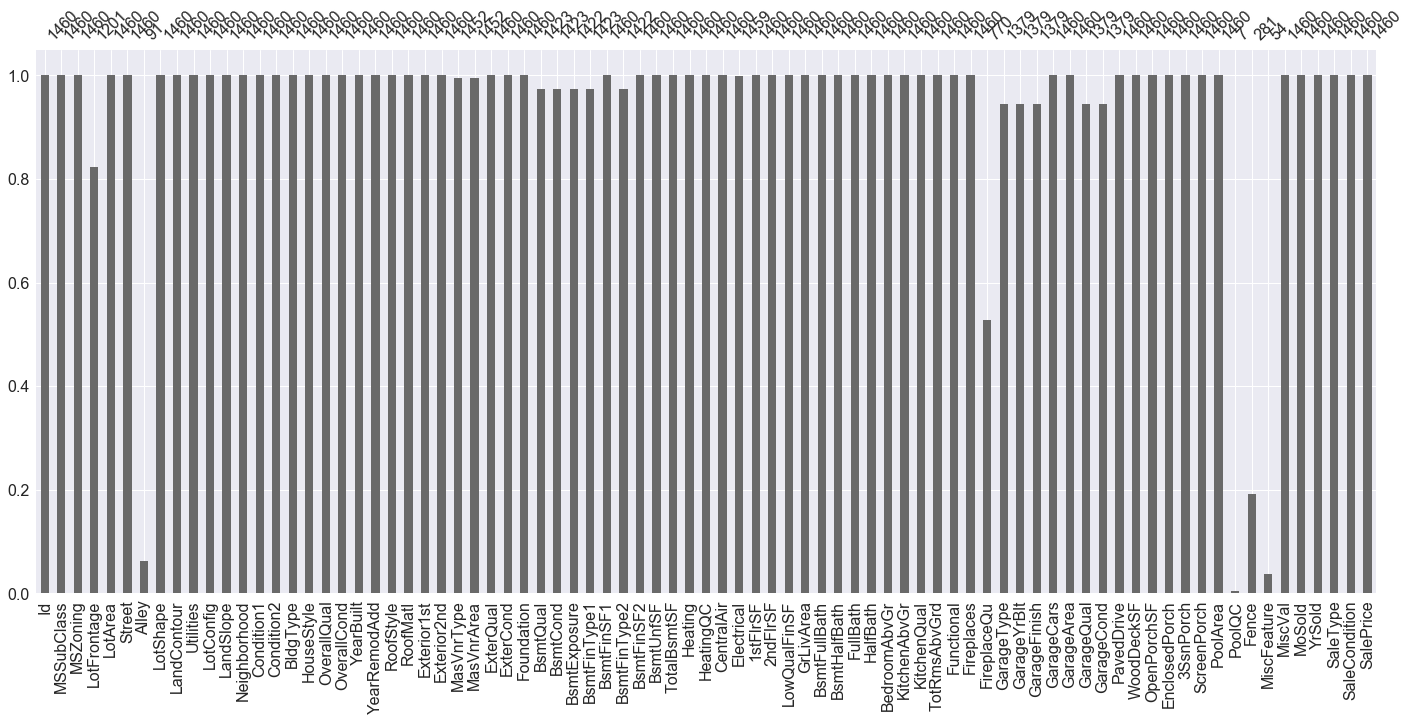

In [13]:
msno.bar(df)

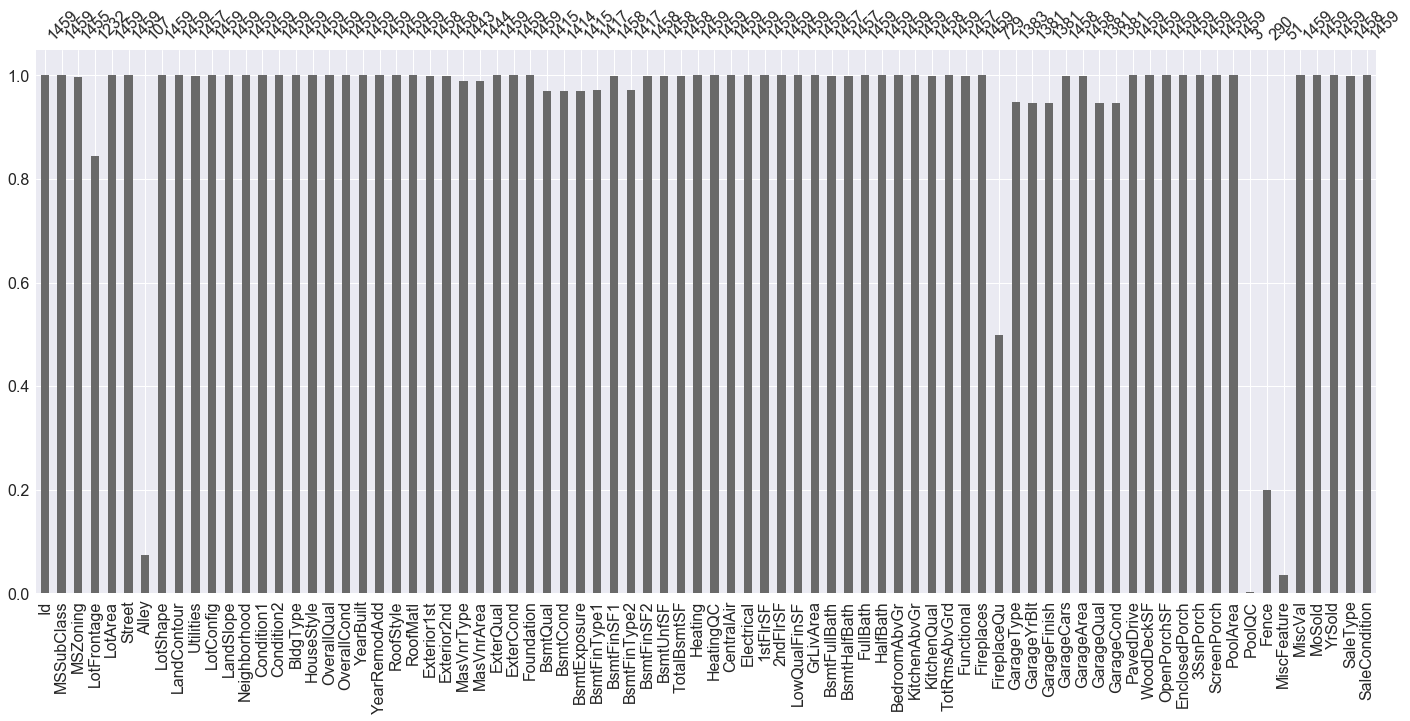

In [14]:
msno.bar(valid)

In [15]:
missing_data_df = df.isnull().sum()
missing_data_df=pd.DataFrame(missing_data_df[missing_data_df>0])
missing_data_df.sort_values(by=0, ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [16]:
missing_data_valid = valid.isnull().sum()
missing_data_valid=pd.DataFrame(missing_data_valid[missing_data_valid>0])
missing_data_valid.sort_values(by=0, ascending=False)

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageYrBlt,78
GarageQual,78
GarageFinish,78


In [17]:
# Checking if any additional features have missing data in test dataset
missing_data_valid = list(set(missing_data_df.index).symmetric_difference(set(missing_data_valid.index)))
missing_data_valid

['Exterior2nd',
 'TotalBsmtSF',
 'SaleType',
 'Exterior1st',
 'BsmtUnfSF',
 'GarageCars',
 'Utilities',
 'BsmtHalfBath',
 'KitchenQual',
 'BsmtFinSF1',
 'Functional',
 'MSZoning',
 'Electrical',
 'BsmtFullBath',
 'BsmtFinSF2',
 'GarageArea']

In [18]:
valid[missing_data_valid].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 16 columns):
Exterior2nd     1458 non-null object
TotalBsmtSF     1458 non-null float64
SaleType        1458 non-null object
Exterior1st     1458 non-null object
BsmtUnfSF       1458 non-null float64
GarageCars      1458 non-null float64
Utilities       1457 non-null object
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
BsmtFinSF1      1458 non-null float64
Functional      1457 non-null object
MSZoning        1455 non-null object
Electrical      1459 non-null object
BsmtFullBath    1457 non-null float64
BsmtFinSF2      1458 non-null float64
GarageArea      1458 non-null float64
dtypes: float64(8), object(8)
memory usage: 182.5+ KB


## Transforming Missing Data

### However, as per the data_description, missing values in most columns imply that the column is inapplicable. Let's see what those columns are:<br>

#### PoolQC: NA means "No Pool" - Not missing data (Make sure the "PoolArea" is 0 for all the rows with missing "PoolQC")

In [19]:
set(df[df['PoolArea']==0]['Id']).symmetric_difference(set(df[df['PoolQC'].isna()]['Id']))

set()

In [20]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [21]:
valid["PoolQC"] = valid["PoolQC"].fillna("None")

#### MiscFeature: NA means no feature - Not missing data

In [22]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [23]:
valid["MiscFeature"] = valid["MiscFeature"].fillna("None")

#### Alley: NA means no alley access - Not missing data

In [24]:
df["Alley"] = df["Alley"].fillna("None")

In [25]:
valid["Alley"] = valid["Alley"].fillna("None")

#### Fence: NA means no fence - Not missing data

In [26]:
df["Fence"] = df["Fence"].fillna("None")

In [27]:
valid["Fence"] = valid["Fence"].fillna("None")

#### FireplaceQu: NA means no fireplace - Not missing data (Make sure the "Fireplaces" is 0 for all the rows with missing "FireplaceQu")

In [28]:
set(df[df['Fireplaces']==0]['Id']).symmetric_difference(set(df[df['FireplaceQu'].isna()]['Id']))

set()

In [29]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [30]:
valid["FireplaceQu"] = valid["FireplaceQu"].fillna("None")

GarageType: NA means No Garage - Not missing data <br>
GarageFinish: NA means No Garage - Not missing data <br>
GarageQual: NA means No Garage - Not missing data <br>
GarageCond: NA means No Garage - Not missing data <br>

In [31]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    valid[col] = valid[col].fillna('None')

#### GarageYrBlt: NA could impy that no garage is available - Make sure that this value is missing only for the houses with "GarageType" as NA

In [33]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [34]:
valid['GarageYrBlt'] = valid['GarageYrBlt'].fillna(0)

BsmtExposure: NA means No basement - Not missing data <br>
BsmtCond: NA means No basement - Not missing data <br>
BsmtQual: NA means No basement - Not missing data <br>
BsmtFinType1: NA means No basement - Not missing data <br>
BsmtFinType2: NA means No basement - Not missing data <br>

In [35]:
set(df[df['BsmtExposure'].isna()]['Id']).symmetric_difference(set(df[df['BsmtFinType1'].isna()]['Id']))

{949}

In [36]:
df[df['Id']==949]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,None,None,None,0,2,2006,WD,Normal,192500


##### For the ID 949, BsmtExposure is NA (No basement) but BsmtFinType1 & BsmtFinType2 are 'Unf' (Unfinished basement). Which is plausible, as Basement could be still under construction.

In [37]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [38]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    valid[col] = valid[col].fillna('None')

MasVnrType: No definition for NA data. Could be missing data?<br>
MasVnrArea: It's a continuous variable. Does missing value imply value '0' (No "Masonry Veneer" is available in the house)? <br>

In [39]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [40]:
df[df['MasVnrType']=='None']['MasVnrArea'].unique()

array([  0., 288.,   1., 344., 312.])

##### 'MasVnrArea' is non-zero for some of the records with 'MasVnrType' as 'None'. So, None type does not indicate the "Masonry veneer" is not available for the house. So, NA could imply "Masonry veneer" is not available.

In [41]:
df[df['MasVnrType'].isna()]['MasVnrArea'].unique()

array([nan])

#### So, we can assume NA in 'MasVnrType' & 'MasVnrArea' implies Masonry veneer is not available in the house.

In [42]:
df["MasVnrType"] = df["MasVnrType"].fillna("NotAvailable")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [43]:
valid["MasVnrType"] = valid["MasVnrType"].fillna("NotAvailable")
valid["MasVnrArea"] = valid["MasVnrArea"].fillna(0)

#### Electrical: No definition for NA. Could be missing data?

In [44]:
df[df['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


##### House with Id 1380 has missing data in "Electrical" column. Let's impute the value with Mode.

In [45]:
df['Electrical'].fillna(df['Electrical'].mode().iloc[0], inplace=True)

In [46]:
valid['Electrical'].fillna(valid['Electrical'].mode().iloc[0], inplace=True)

In [47]:
df[df['Id']==1380]['Electrical']

1379    SBrkr
Name: Electrical, dtype: object

#### LotFrontage: It's a continuous variable. Does missing value imply value '0' (No Lot Frontage available to the house)?

In [48]:
sorted(df.LotFrontage.unique()[:5])

[60.0, 65.0, 68.0, 80.0, 84.0]

##### It could most probably mean no lot frontage is available to the house. Let's impute missing values with '0.0'

In [49]:
df['LotFrontage'] = df['LotFrontage'].fillna(0.0)

In [50]:
valid['LotFrontage'] = valid['LotFrontage'].fillna(0.0)

### Imputing additional missing columns from test dataset

In [51]:
df['Exterior1st'] = df['Exterior1st'].fillna('Other')
valid['Exterior1st'] = valid['Exterior1st'].fillna('Other')

In [52]:
df['Functional'].fillna(df['Functional'].mode().iloc[0], inplace=True)
valid['Functional'].fillna(valid['Functional'].mode().iloc[0], inplace=True)

In [53]:
df['KitchenQual'].fillna(df['KitchenQual'].mode().iloc[0], inplace=True)
valid['KitchenQual'].fillna(valid['KitchenQual'].mode().iloc[0], inplace=True)

In [54]:
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')
valid['Exterior2nd'] = valid['Exterior2nd'].fillna('Other')

In [55]:
sorted(valid['GarageArea'].unique())[:5]

[0.0, 100.0, 160.0, 162.0, 164.0]

In [56]:
df['GarageArea'] = df['GarageArea'].fillna(0.0)
valid['GarageArea'] = valid['GarageArea'].fillna(0.0)

In [57]:
df['MSZoning'].fillna(df['MSZoning'].mode().iloc[0], inplace=True)
valid['MSZoning'].fillna(valid['MSZoning'].mode().iloc[0], inplace=True)

In [58]:
valid['BsmtHalfBath'].unique()

array([ 0.,  1., nan,  2.])

In [59]:
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode().iloc[0], inplace=True)
valid['BsmtHalfBath'].fillna(valid['BsmtHalfBath'].mode().iloc[0], inplace=True)

In [60]:
sorted(valid['BsmtUnfSF'].unique())[:5]

[0.0, 22.0, 35.0, 52.0, 53.0]

In [61]:
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(), inplace=True)
valid['BsmtUnfSF'].fillna(valid['BsmtUnfSF'].mean(), inplace=True)

In [62]:
valid['GarageCars'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [63]:
df['GarageCars'].fillna(df['GarageCars'].mode().iloc[0], inplace=True)
valid['GarageCars'].fillna(valid['GarageCars'].mode().iloc[0], inplace=True)

In [64]:
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
valid['TotalBsmtSF'].fillna(valid['TotalBsmtSF'].mean(), inplace=True)

In [65]:
df['Utilities'].fillna(df['Utilities'].mode().iloc[0], inplace=True)
valid['Utilities'].fillna(valid['Utilities'].mode().iloc[0], inplace=True)

In [66]:
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode().iloc[0], inplace=True)
valid['BsmtFullBath'].fillna(valid['BsmtFullBath'].mode().iloc[0], inplace=True)

In [67]:
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace=True)
valid['BsmtFinSF2'].fillna(valid['BsmtFinSF2'].mean(), inplace=True)

df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(), inplace=True)
valid['BsmtFinSF1'].fillna(valid['BsmtFinSF1'].mean(), inplace=True)

In [68]:
valid['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [69]:
df['SaleType'].fillna('Oth', inplace=True)
valid['SaleType'].fillna('Oth', inplace=True)

In [70]:
missing_data2_df = df.isnull().sum()
missing_data2_df=pd.DataFrame(missing_data2_df[missing_data2_df>0])
missing_data2_df.sort_values(by=0, ascending=False)

,0


In [71]:
missing_data2_valid = valid.isnull().sum()
missing_data2_valid=pd.DataFrame(missing_data2_valid[missing_data2_valid>0])
missing_data2_valid.sort_values(by=0, ascending=False)

,0


### Checking for duplicate records

In [72]:
# Check for duplicates
print("Train Data: There are " + str(df.shape[0] - len(set(df.Id))) + " duplicate IDs for " + str(df.shape[0]) + " total entries")
print("Validation Data: There are " + str(valid.shape[0] - len(set(valid.Id))) + " duplicate IDs for " + str(valid.shape[0]) + " total entries")

# Drop Id column
df.drop("Id", axis = 1, inplace = True)

Train Data: There are 0 duplicate IDs for 1460 total entries
Validation Data: There are 0 duplicate IDs for 1459 total entries


In [73]:
df.to_csv('df_train_EDA.csv',sep=',',index=False)
valid.to_csv('df_valid_EDA.csv',sep=',',index=False)

In [27]:
df = pd.read_csv('df_train_EDA.csv',sep=',')
valid = pd.read_csv('df_valid_EDA.csv',sep=',')

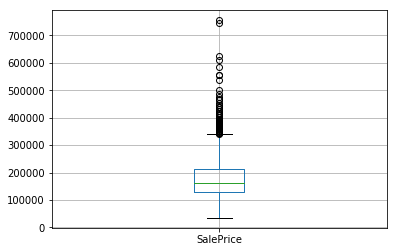

In [28]:
df.boxplot(column='SalePrice',)


 mu = 180921.20 and sigma = 79415.29



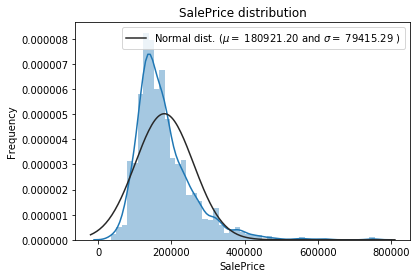

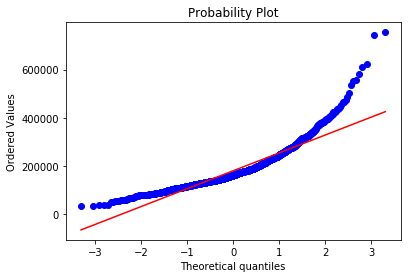

In [30]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show();

##### The target variable is right skewed. As (linear) models work well on normally distributed data , we need to transform this variable and make it more normally distributed.

## Log-Transofrming the 'Y' variable - SalePrice


 mu = 12.02 and sigma = 0.40



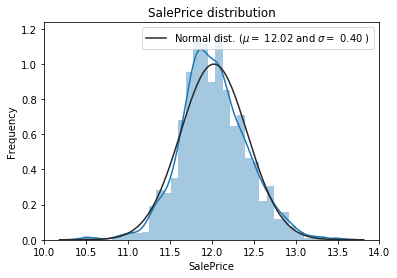

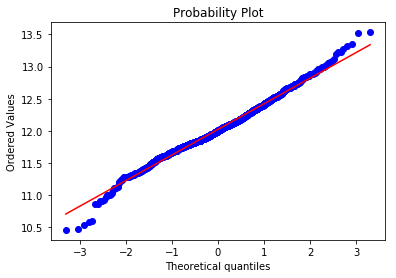

In [31]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show();

In [32]:
pandas_profiling.ProfileReport(df)

Number of variables,80
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,912.6 KiB
Average record size in memory,640.1 B
Numeric,37
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Features Engineering

In [79]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [80]:
df.shape

(1460, 80)

#### Creating "age" column based on 'year' related features

In [33]:
df['ageHouse'] = df['YrSold']-df['YearBuilt']
df['ageRemodel'] = df['YrSold']-df['YearRemodAdd']
df['ageGarage'] = df['YrSold']-df['GarageYrBlt']

valid['ageHouse'] = valid['YrSold']-valid['YearBuilt']
valid['ageRemodel'] = valid['YrSold']-valid['YearRemodAdd']
valid['ageGarage'] = valid['YrSold']-valid['GarageYrBlt']

In [34]:
df.shape
valid.shape

(1460, 83)

(1459, 83)

In [35]:
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1, inplace=True)
df.shape

valid.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1, inplace=True)
valid.shape

(1460, 80)

(1459, 80)

#### Setting age features to 0 wherever they are negative - Could be bad data

In [96]:
df[df['ageHouse']<0]
valid[valid['ageHouse']<0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageHouse,ageRemodel,ageGarage


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ageHouse,ageRemodel,ageGarage
1089,2550,SC20,RL,128.0,39290,2,0,3,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,3,2,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,2,1,PConc,2,1,4,2,4010.0,1,0.0,1085.0,5095.0,GasA,2,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,2,15,4,2,1,Attchd,Fin,3.0,1154.0,1,1,2,546,484,0,0,0,0,0,None,None,17000,Oct,2007,New,Partial,-1,0,-1.0


In [36]:
df[df['ageRemodel']<0]
valid[valid['ageRemodel']<0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageHouse,ageRemodel,ageGarage
523,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,None,None,None,0,10,2007,New,Partial,12.126764,0,-1,0.0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ageHouse,ageRemodel,ageGarage
835,2296,60,RL,134.0,16659,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,None,None,None,0,6,2007,New,Partial,0,-1,0.0
1089,2550,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,None,17000,10,2007,New,Partial,-1,-2,-1.0


In [95]:
df[df['ageGarage']<0]
valid[valid['ageGarage']<0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageHouse,ageRemodel,ageGarage


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ageHouse,ageRemodel,ageGarage
1089,2550,SC20,RL,128.0,39290,2,0,3,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,3,2,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,2,1,PConc,2,1,4,2,4010.0,1,0.0,1085.0,5095.0,GasA,2,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,2,15,4,2,1,Attchd,Fin,3.0,1154.0,1,1,2,546,484,0,0,0,0,0,None,None,17000,Oct,2007,New,Partial,-1,0,-1.0
1132,2593,SC20,RL,68.0,8298,2,0,3,HLS,4,Inside,3,Timber,Norm,Norm,1Fam,1Story,3,2,Hip,CompShg,VinylSd,VinylSd,NotAvailable,0.0,2,1,PConc,2,1,3,2,583.0,1,0.0,963.0,1546.0,GasA,2,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,2,6,4,1,1,Attchd,RFn,2.0,502.0,1,1,2,132,0,0,0,0,0,0,None,None,0,Sep,2007,New,Partial,1,0,-200.0


In [97]:
df.loc[(df.ageHouse<0),'ageHouse'] = 0
valid.loc[(valid.ageHouse<0),'ageHouse'] = 0

In [98]:
df.loc[(df.ageRemodel<0),'ageRemodel'] = 0
valid.loc[(valid.ageRemodel<0),'ageRemodel'] = 0

In [99]:
df.loc[(df.ageGarage<0),'ageGarage'] = 0
valid.loc[(valid.ageGarage<0),'ageGarage'] = 0

#### Converting Numerical variables which are infact categorical variables as per data description

In [51]:
#Year and month sold are transformed into categorical features.
df.YrSold = df.YrSold.astype(str)

# Some numerical features are actually really categories
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [52]:
valid.YrSold = valid.YrSold.astype(str)

# Some numerical features are actually really categories
valid = valid.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

#### Check this later: Label Encoding some categorical variables that may contain information in their ordering set

In [53]:
# Encode some categorical features as ordered numbers when there is information in the order
df = df.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None":0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO":1, "NoSeWa":2, "NoSewr":3, "AllPub":4}}
                     )

In [54]:
# Encode some categorical features as ordered numbers when there is information in the order
valid = valid.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None":0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

### Putting the different ordinal features into 3 bins:  Simplifications of existing features - bad, average, good

In [55]:
df["OverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["OverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["PoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["GarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["GarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["FireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["FireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["Functional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["KitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["HeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["BsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["BsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["BsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["BsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["ExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["ExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [56]:
valid["OverallQual"] = valid.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
valid["OverallCond"] = valid.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
valid["PoolQC"] = valid.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
valid["GarageCond"] = valid.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
valid["GarageQual"] = valid.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
valid["FireplaceQu"] = valid.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
valid["FireplaceQu"] = valid.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
valid["Functional"] = valid.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
valid["KitchenQual"] = valid.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
valid["HeatingQC"] = valid.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
valid["BsmtFinType1"] = valid.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
valid["BsmtFinType2"] = valid.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
valid["BsmtCond"] = valid.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
valid["BsmtQual"] = valid.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
valid["ExterCond"] = valid.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
valid["ExterQual"] = valid.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [100]:
df.shape
valid.shape

(1460, 80)

(1459, 80)

### Checking for skewed-features

In [58]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 53
Categorical features : 26


In [59]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

44 skewed numerical features to log transform


In [60]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features_valid = valid.select_dtypes(include = ["object"]).columns
numerical_features_valid = valid.select_dtypes(exclude = ["object"]).columns
numerical_features_valid = numerical_features_valid.drop("Id")
print("Numerical features : " + str(len(numerical_features_valid)))
print("Categorical features : " + str(len(categorical_features_valid)))
valid_num = valid[numerical_features_valid]
valid_cat = valid[categorical_features_valid]

Numerical features : 53
Categorical features : 26


In [61]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness_valid = valid_num.apply(lambda x: skew(x))
skewness_valid = skewness_valid[abs(skewness_valid) > 0.5]
print(str(skewness_valid.shape[0]) + " skewed numerical features to log transform")
skewed_features_valid = skewness_valid.index
valid_num[skewed_features_valid] = np.log1p(valid_num[skewed_features_valid])

40 skewed numerical features to log transform


In [62]:
valid_cat['dataset'] = 'Test'
df_cat['dataset'] = 'Train'
df_cat.shape
valid_cat.shape

(1460, 27)

(1459, 27)

In [63]:
all_cat = pd.concat([valid_cat, df_cat])
all_cat.shape

(2919, 27)

## Creating dummy variables for categorical features

In [64]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features : " + str(all_cat.isnull().values.sum()))
all_cat_dummies = pd.get_dummies(all_cat,drop_first=True)
print("Remaining NAs for categorical features : " + str(all_cat_dummies.isnull().values.sum()))

NAs for categorical features : 0
Remaining NAs for categorical features : 0


In [65]:
valid_cat_dummy = all_cat_dummies[all_cat_dummies['dataset_Train'] == 0]
df_cat_dummy = all_cat_dummies[all_cat_dummies['dataset_Train'] == 1]

In [66]:
valid_cat_dummy.drop('dataset_Train', axis=1, inplace=True)
df_cat_dummy.drop('dataset_Train', axis=1, inplace=True)

In [67]:
valid_cat_dummy.shape
df_cat_dummy.shape

(1459, 182)

(1460, 182)

In [68]:
df2 = pd.concat([df_num, df_cat_dummy, df['SalePrice']], axis = 1)
print(df2.shape)

(1460, 236)


In [69]:
valid2 = pd.concat([valid_num, valid_cat_dummy], axis = 1)
print(valid2.shape)

(1459, 235)


## Saving the dataframe as CSV file

In [101]:
df2.to_csv('df_transformed_0103.csv', sep=',',index=False)
valid2.to_csv('valid_transformed_0103.csv', sep=',',index=False)

# Loading Pre-Processed Dataset

In [102]:
df3 = pd.read_csv('df_transformed_0103.csv')
df3_test = pd.read_csv('valid_transformed_0103.csv')

In [103]:
df3.shape

(1460, 236)

In [104]:
df3_test.shape

(1459, 235)

In [105]:
df3.head()

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,65.0,9.042040,1.098612,0.0,1.609438,1.609438,1.386294,3,1.098612,5.283204,1.098612,0.693147,2,0.693147,0.693147,1.098612,6.561031,0.693147,0.0,5.017280,6.753438,1.098612,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2,2.197225,1.609438,0.000000,0,2,548,0.693147,0.693147,1.098612,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.247699
1,80.0,9.169623,1.098612,0.0,1.609438,1.609438,1.386294,2,1.386294,0.000000,0.693147,0.693147,2,0.693147,1.609438,1.098612,6.886532,0.693147,0.0,5.652489,7.141245,1.098612,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1,1.945910,1.609438,0.693147,1,2,460,0.693147,0.693147,1.098612,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.109016
2,68.0,9.328212,1.098612,0.0,1.386294,1.609438,1.386294,3,1.098612,5.093750,1.098612,0.693147,2,0.693147,1.098612,1.098612,6.188264,0.693147,0.0,6.075346,6.825460,1.098612,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,2,1.945910,1.609438,0.693147,1,2,608,0.693147,0.693147,1.098612,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.317171
3,60.0,9.164401,1.098612,0.0,1.386294,1.609438,1.386294,3,1.098612,0.000000,0.693147,0.693147,1,1.098612,0.693147,1.098612,5.379897,0.693147,0.0,6.293419,6.629363,1.098612,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2,2.079442,1.609438,0.693147,1,3,642,0.693147,0.693147,1.098612,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11.849405
4,84.0,9.565284,1.098612,0.0,1.386294,1.609438,1.386294,3,1.098612,5.860786,1.098612,0.693147,2,0.693147,1.386294,1.098612,6.486161,0.693147,0.0,6.196444,7.044033,1.098612,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2,2.302585,1.609438,0.693147,1,3,836,0.693147,0.693147,1.098612,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.429220


In [106]:
y = df3['SalePrice']
X = df3.drop('SalePrice', axis=1, inplace=False)
y.shape
X.shape

(1460,)

(1460, 235)

In [107]:
y.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

## Splitting Data into train and test

In [108]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1095, 235)
X_test : (365, 235)
y_train : (1095,)
y_test : (365,)


# 1. Linear Regression

In [109]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

In [110]:
#dictionary for storing the RMSE and R2 of different model.
list_model_rmse = {}
list_model_r2 = {}

In [111]:
lm = LinearRegression()

# Train the model using the training sets
linreg = lm.fit(X_train,y_train)

print('R-squared score (training): {}'
     .format(linreg.score(X_train, y_train)))

R-squared score (training): 0.9351031255379795


In [112]:
print('R-squared score (test): {}'
     .format(linreg.score(X_test, y_test)))
list_model_r2['Linear Regression'] = linreg.score(X_test, y_test)

R-squared score (test): 0.897815808152034


In [113]:
y_test_predict = linreg.predict(X_test)
linreg_predict = pd.DataFrame(list(zip((math.exp(i) for i in y_test),(math.exp(i) for i in y_test_predict))),columns=['Actual','Predicted'])

In [114]:
linreg_predict.head()

,Actual,Predicted
0,212001.0,215658.056719
1,193001.0,184395.725380
2,274971.0,255230.425768
3,107001.0,93583.754299
4,135001.0,134012.393786


In [115]:
print('Root Mean Square error(training): {}'
     .format(sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

list_model_rmse['Linear Regression'] = sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

Root Mean Square error(training): 0.12949247786195311


Text(0.5,0,'Input Observation')

Text(0,0.5,'Target Value')

Text(0.5,1,'Linear Regression: Actual Vs Predicted')

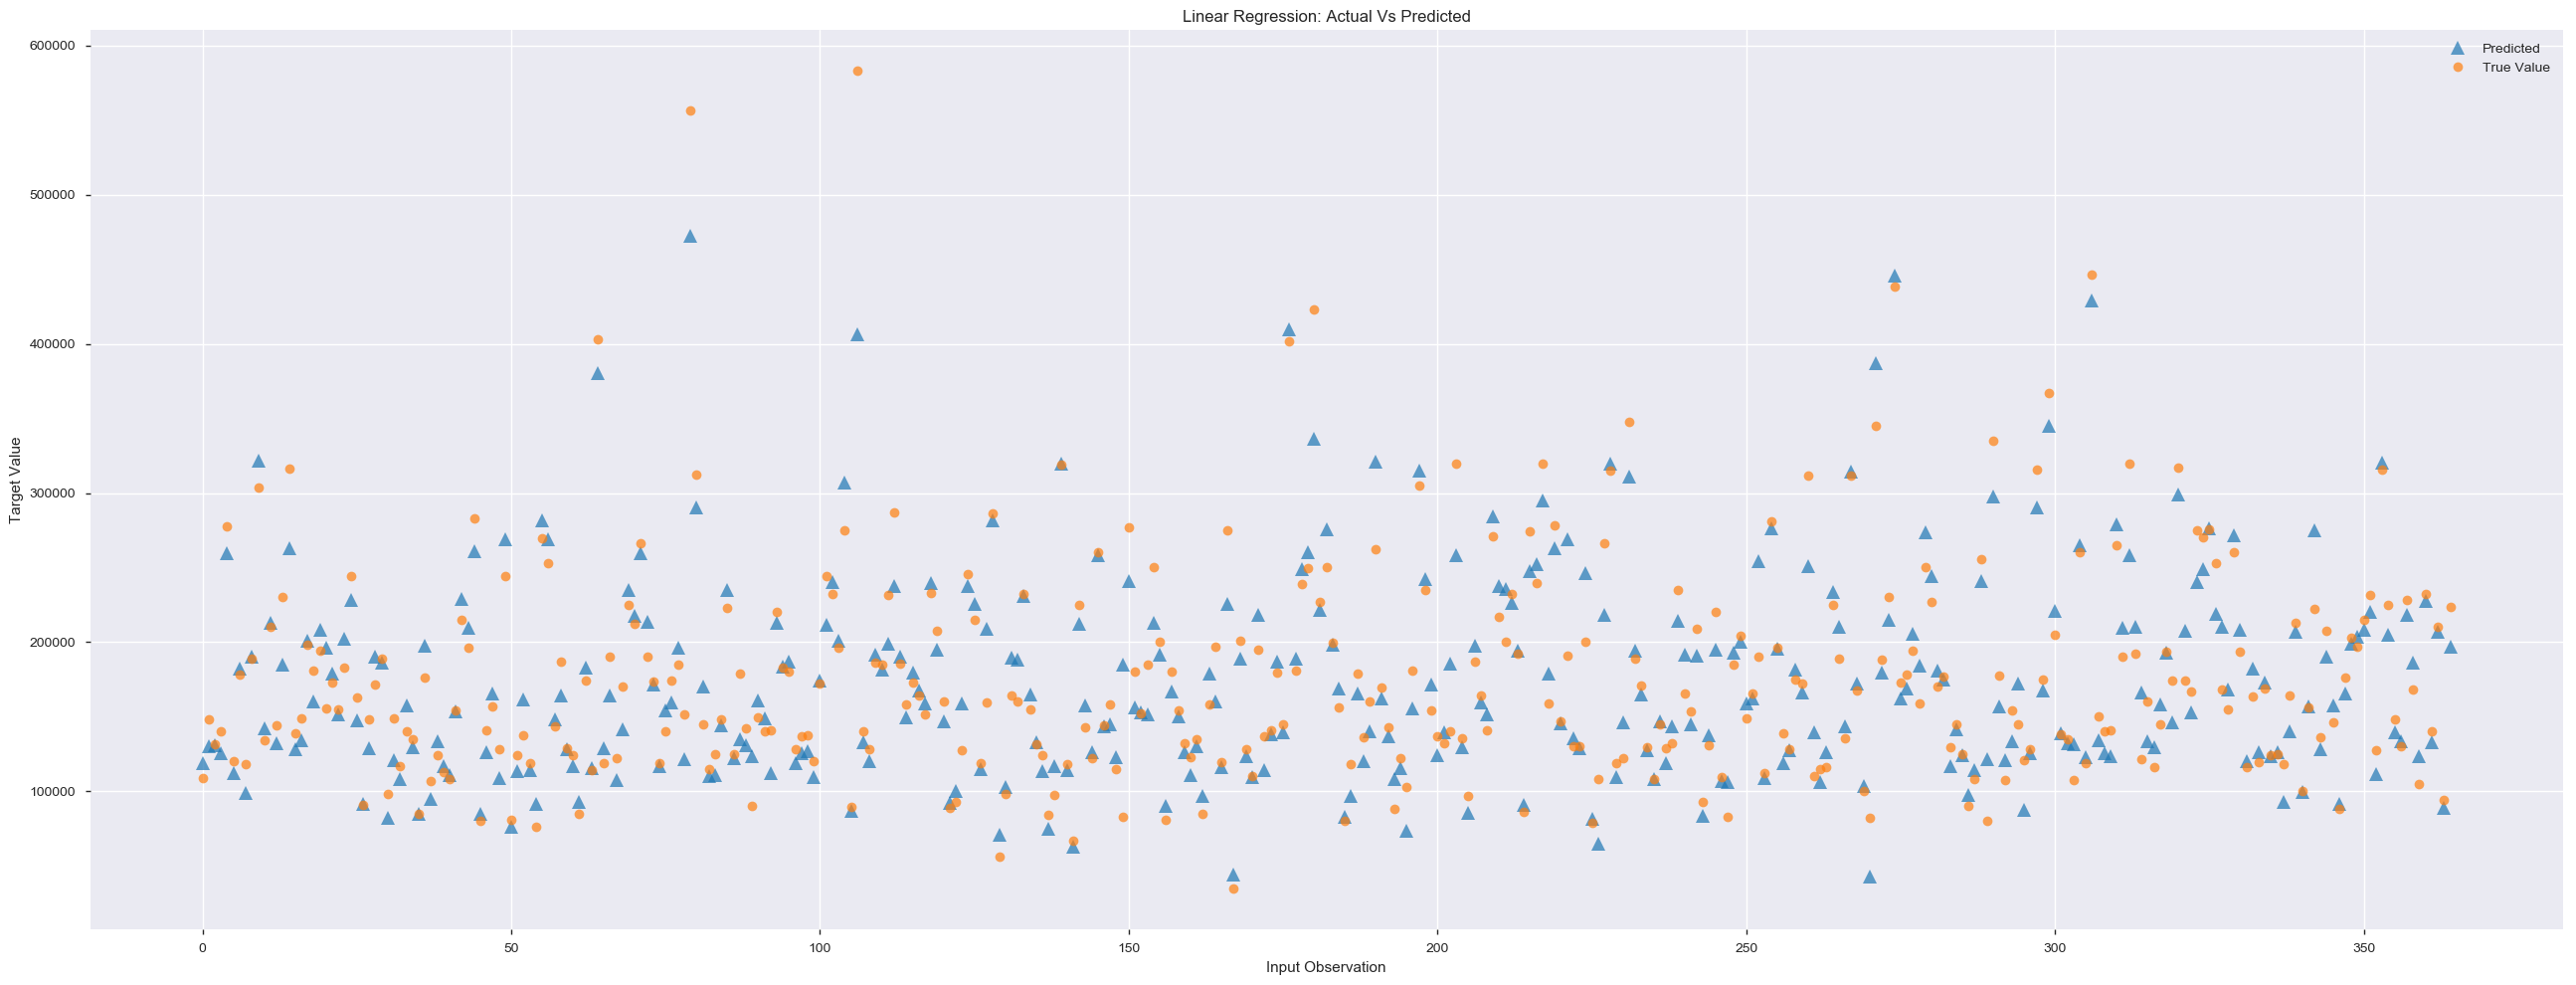

In [119]:
fig = plt.figure(figsize=(26,10))
thisaxis = fig.add_subplot(111)

X = linreg_predict.index

thisaxis.plot(X, linreg_predict['Predicted'], '^', markersize = 10,label='Predicted', alpha=0.7)
thisaxis.plot(X, linreg_predict['Actual'], 'o', label='True Value', alpha=0.7)
thisaxis.set_xlabel('Input Observation')
thisaxis.set_ylabel('Target Value')
thisaxis.set_title('Linear Regression: Actual Vs Predicted')
thisaxis.legend()
plt.tight_layout()

# 2. LinearRegressor with Cross-Validation

In [116]:
# cross validation - R-squared scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg,X,y,cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [0.72589364 0.87673724 0.79974966 0.88986519 0.83034978]
Average cross-validation scroe: 0.82


## Scaling Numerical & Ordinal Features

#### Extracting names of numerical features to apply scaling

In [117]:
numerical_features = ['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'ageHouse', 'ageRemodel', 'ageGarage']
numerical_features_valid=['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'ageHouse', 'ageRemodel', 'ageGarage']

In [118]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
df3_test_scaled = df3_test.copy()

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled[list(numerical_features)] = scaler.fit_transform(X_train_scaled[list(numerical_features)])

X_test_scaled[list(numerical_features)] = scaler.fit_transform(X_test_scaled[list(numerical_features)])

In [120]:
missing_data_test = df3_test_scaled.isnull().sum()
missing_data_test=pd.DataFrame(missing_data_test[missing_data_test>0])
missing_data_test.sort_values(by=0, ascending=False)

,0
ageGarage,1


#### Imputing missing data in test dataset

In [125]:
df3_test_scaled['ageGarage'].mean()

-inf

#### Looks like there are some infinite values in test dataset. Let's impute them.

In [137]:
df3_test_scaled.replace([np.inf,-np.inf], np.nan, inplace=True)

In [138]:
df3_test_scaled['ageGarage'].mean()

3.12665664913304

In [141]:
df3_test_scaled['ageGarage'].fillna(df3_test_scaled['ageGarage'].mean(), inplace=True)
df3_test_scaled['ageHouse'].fillna(df3_test_scaled['ageHouse'].mean(), inplace=True)

In [143]:
#Scaling test data
scaler_test = StandardScaler()
df3_test_scaled[list(numerical_features)] = scaler_test.fit_transform(df3_test_scaled[list(numerical_features)])

In [144]:
X_train_scaled.head()

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,...,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
452,-1.663317,0.055120,0.067729,-0.256071,-0.903010,0.030234,0.207101,-0.698902,-0.403483,0.605937,1.325966,-0.339222,0.959648,0.004989,-0.542479,0.806351,0.774473,0.014852,-0.34552,-0.420317,0.017460,0.707107,-0.698762,1.199779,-0.141924,0.599755,1.115658,-0.235790,0.790324,1.265366,0.136111,-0.230168,-0.940575,0.388803,0.244246,-1.001932,-1.045796,0.315368,-0.237293,0.207015,0.212934,0.290027,0.983148,1.193458,-0.39053,-0.131942,-0.287234,-0.074218,-0.0728,-0.18849,...,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
72,0.459882,0.218075,0.067729,-0.256071,-0.903010,0.030234,0.207101,1.243479,-0.403483,0.587851,-0.754167,-0.339222,0.959648,0.004989,-0.542479,-0.841363,-1.450355,0.014852,-0.34552,0.587359,-0.023345,0.707107,-0.709356,1.187285,-0.141924,0.534417,-0.849001,-0.235790,0.790324,1.265366,0.136111,-0.230168,-0.940575,0.388803,0.244246,0.740028,0.956209,0.315368,-0.214012,0.207015,0.212934,0.290027,-0.937273,1.072782,-0.39053,-0.131942,3.817267,-0.074218,-0.0728,-0.18849,...,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
136,-1.663317,0.257531,0.067729,-0.256071,-0.903010,0.030234,0.207101,-0.698902,-0.403483,1.183898,-0.754167,-0.339222,-0.864683,0.004989,-0.542479,0.806351,0.752481,0.014852,-0.34552,0.330676,0.305055,-1.414214,0.280316,-0.856856,-0.141924,-0.502499,-0.849001,-0.235790,0.790324,-0.757430,0.136111,-0.230168,-0.940575,-0.955872,0.244246,0.740028,0.956209,-1.023111,-0.721540,0.207015,0.212934,0.290027,-0.937273,1.149690,-0.39053,-0.131942,-0.287234,-0.074218,-0.0728,-0.18849,...,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
93,0.058196,-0.429027,0.067729,-0.256071,0.649839,0.030234,0.207101,-0.698902,-0.403483,-0.822332,-0.754167,-0.339222,-0.864683,0.004989,0.570593,-0.841363,0.889906,0.014852,-0.34552,-0.281571,0.305055,0.707107,0.396780,1.252024,-0.141924,1.394081,-0.849001,4.171316,0.790324,-0.757430,1.338055,4.159212,-0.940575,1.431815,0.244246,0.740028,0.956209,0.315368,0.153830,0.207015,0.212934,0.290027,-0.937273,-1.054707,-0.39053,-0.131942,3.042473,-0.074218,-0.0728,-0.18849,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
293,-1.663317,1.155903,0.067729,-0.256071,-0.903010,0.030234,0.207101,1.243479,1.781323,0.527767,-0.754167,-0.339222,-0.864683,0.004989,-0.542479,0.806351,0.797663,0.014852,-0.34552,-3.076023,-0.062874,-1.414214,0.875274,1.173113,-0.141924,1.357350,1.115658,-0.235790,0.790324,1.265366,0.136111,-0.230168,1.063179,1.431815,0.244246,0.740028,0.956209,0.315368,0.307485,0.207015,0.212934,0.290027,-0.937273,1.526685,

### Scaling complete X - To be used in cross-validation

In [145]:
X_scaled = X.copy()

In [146]:
scaler = StandardScaler()
X_scaled[list(numerical_features)] = scaler.fit_transform(X_scaled[list(numerical_features)])

# 3. KNN Regressor

In [25]:
knn_reg = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,2,3,4,5,7,10,11,12,15]}

gs_knn = GridSearchCV(knn_reg, param_grid, cv=5)
gs_knn.fit(X_scaled, y)
gs_knn.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 11, 12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 11}

In [26]:
knn_reg_best = KNeighborsRegressor(n_neighbors=11)
knn_reg_best.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='uniform')

In [27]:
y_test_pred_knn = knn_reg_best.predict(X_test_scaled)
R2_knn = r2_score(y_test,y_test_pred_knn)
print('KNN R-Squared Score (train): {}'
     .format(R2_knn))

rmse_knn = sqrt(mean_squared_error(y_test,y_test_pred_knn))
print('KNN RMSE (train): {}'
     .format(rmse_knn))

list_model_rmse['KNN'] = rmse_knn
list_model_r2['KNN'] = R2_knn

KNN R-Squared Score (train): 0.8108183729403865
KNN RMSE (train): 0.1666757464294193


# 4. Ridge Regression with Regularization - Using GridSearch & Cross-Validation

In [28]:
# finding best alpha by gridsearch
ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs_ridge = GridSearchCV(ridge_reg, param_grid, cv=5)
gs_ridge.fit(X_scaled, y)
gs_ridge.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 10}

In [29]:
ridge_reg_best = Ridge(alpha=10,tol=0.000000001)
ridge_reg_best.fit(X_train_scaled, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-09)

In [30]:
y_test_pred_ridge = ridge_reg_best.predict(X_test_scaled)
R2_ridge = r2_score(y_test,y_test_pred_ridge)
print('Ridge R-Squared Score (train): {}'
     .format(R2_ridge))

rmse_ridge = sqrt(mean_squared_error(y_test,y_test_pred_ridge))
print('Ridge R-Squared Score (train): {}'
     .format(rmse_ridge))

list_model_rmse['Ridge Regression'] = rmse_ridge
list_model_r2['Ridge Regression'] = R2_ridge

Ridge R-Squared Score (train): 0.8937785925246209
Ridge R-Squared Score (train): 0.12489324693743963


<Figure size 1728x720 with 0 Axes>

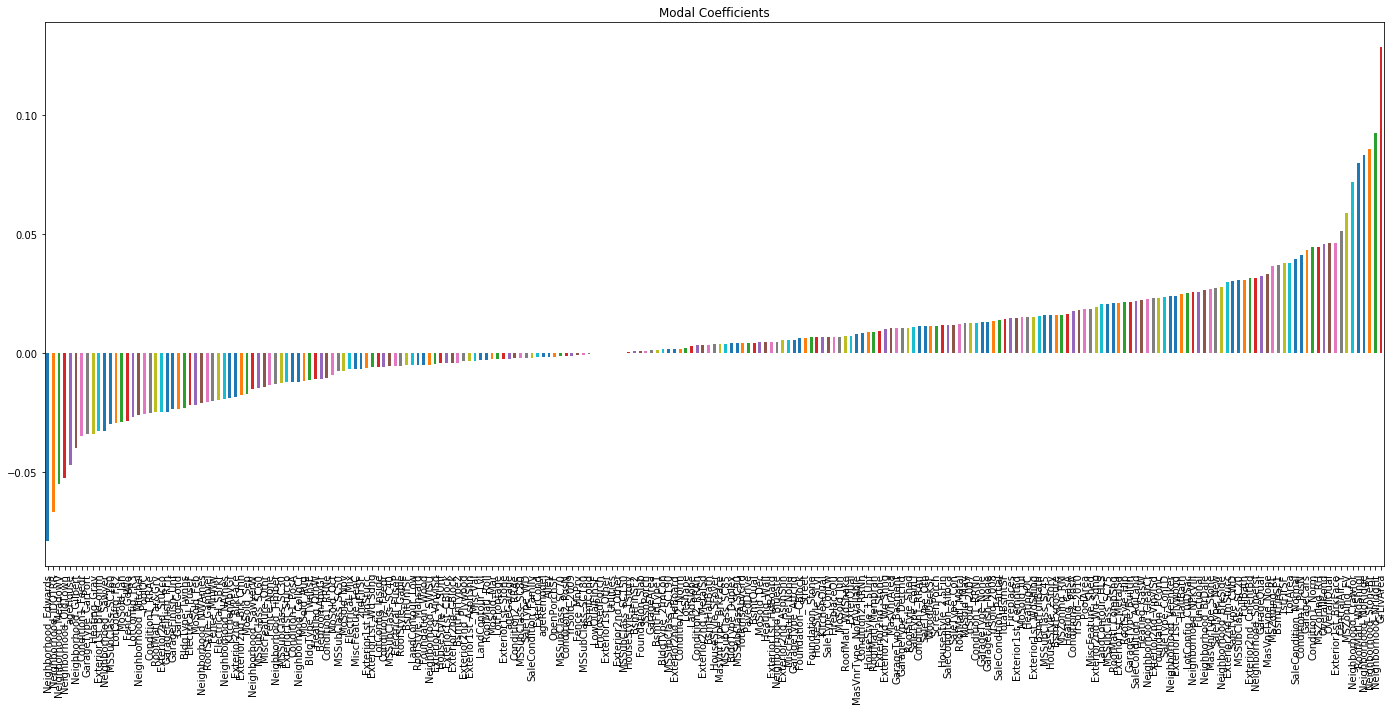

In [31]:
plt.figure(figsize=(24,10))
predictors = X_train.columns

coef = pd.Series(ridge_reg_best.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# 5. Lasso Regression with Regularization - Using GridSearch & Cross-Validation

In [147]:
lasso_reg = Lasso()
param_grid = {'alpha':[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1],
             'max_iter':[10000, 50000]}

gs_lasso = GridSearchCV(lasso_reg, param_grid, cv=5)
gs_lasso.fit(X_scaled, y)
gs_lasso.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 'max_iter': [10000, 50000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'alpha': 0.0006, 'max_iter': 10000}

In [158]:
lasso_reg_best = Lasso(alpha = 0.0006, max_iter = 10000, tol=0.000000001)
lasso_reg_best.fit(X_train_scaled, y_train)

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-09, warm_start=False)

In [159]:
y_test_pred_lasso = lasso_reg_best.predict(X_test_scaled)
R2_test_lasso = r2_score(y_test,y_test_pred_lasso)
print('Lasso R-Squared Score (test): {}'
     .format(R2_test_lasso))

rmse_test_lasso = sqrt(mean_squared_error(y_test,y_test_pred_lasso))
print('Lasso RMSE(test): {}'
     .format(rmse_test_lasso))

list_model_rmse['Lasso Regression'] = rmse_test_lasso
list_model_r2['Lasso Regression'] = R2_test_lasso

Lasso R-Squared Score (test): 0.9038445311049613
Lasso RMSE(test): 0.12561447251644103


<Figure size 2400x1000 with 0 Axes>

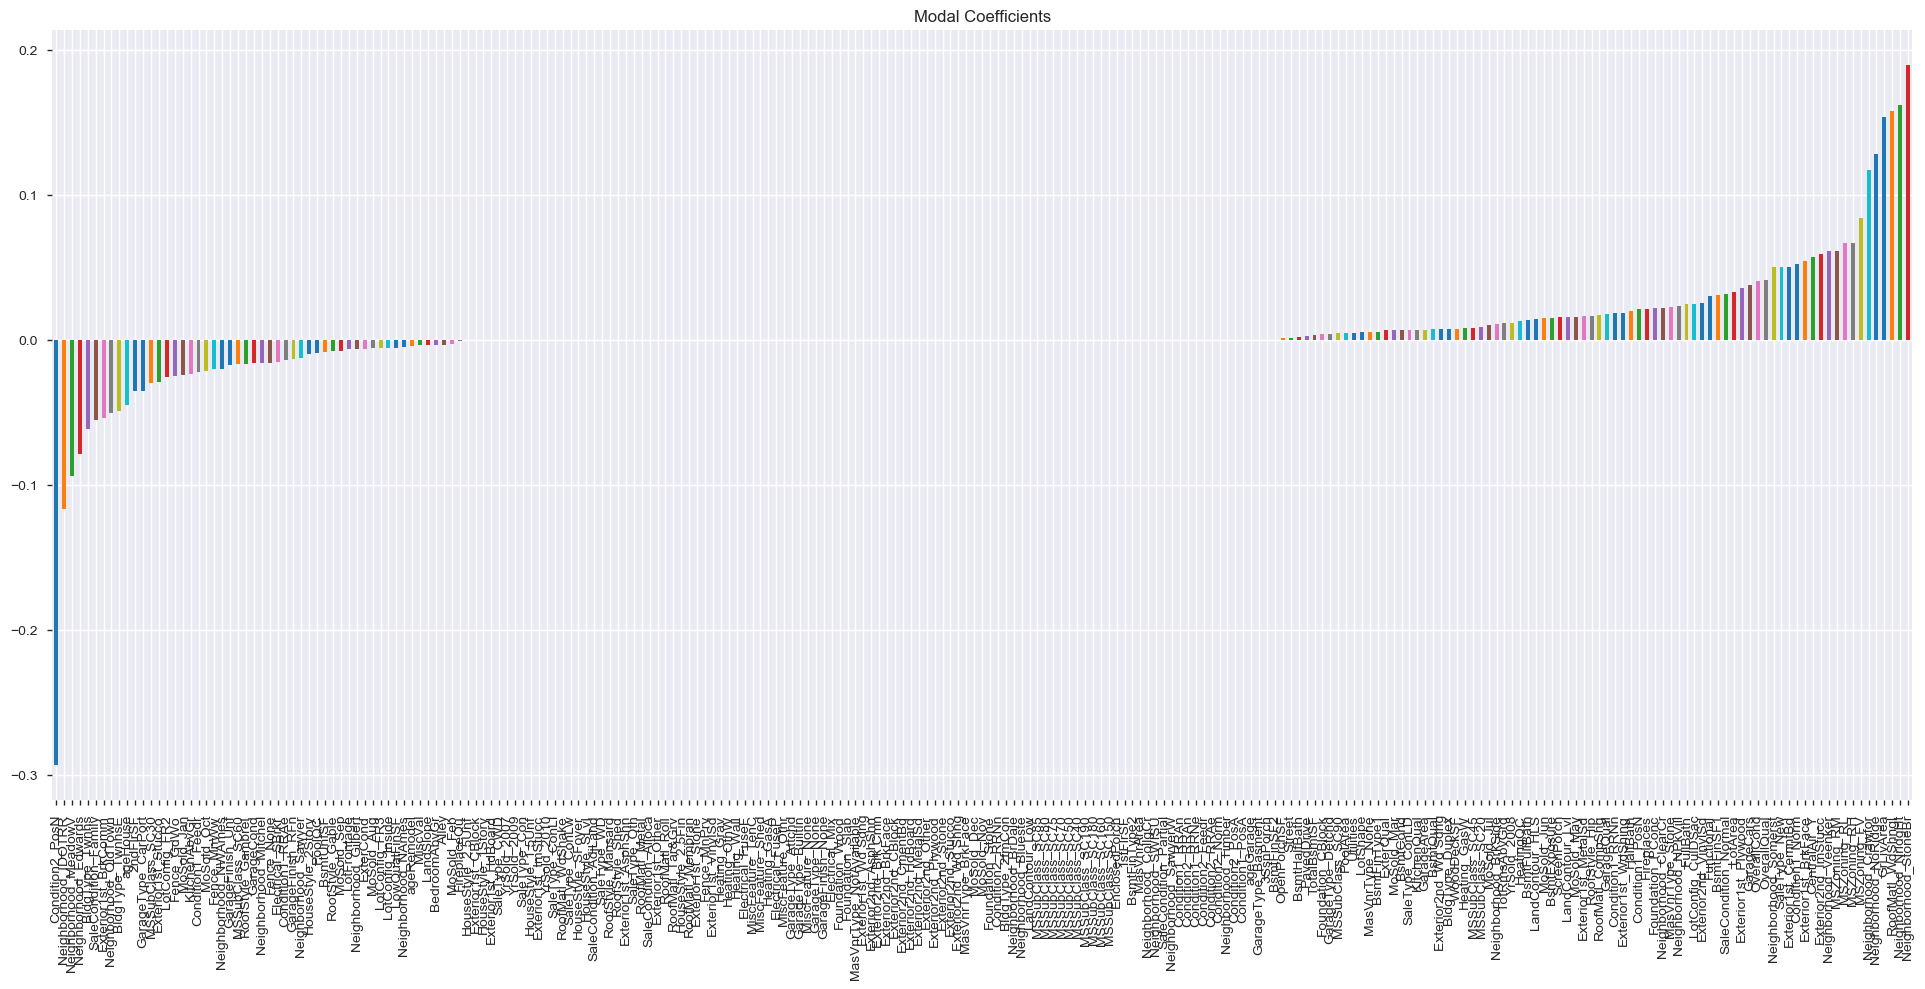

In [150]:
plt.figure(figsize=(24,10))
predictors = X_train.columns

coef = pd.Series(lasso_reg_best.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Lasso: Selected Features

<Figure size 1728x720 with 0 Axes>

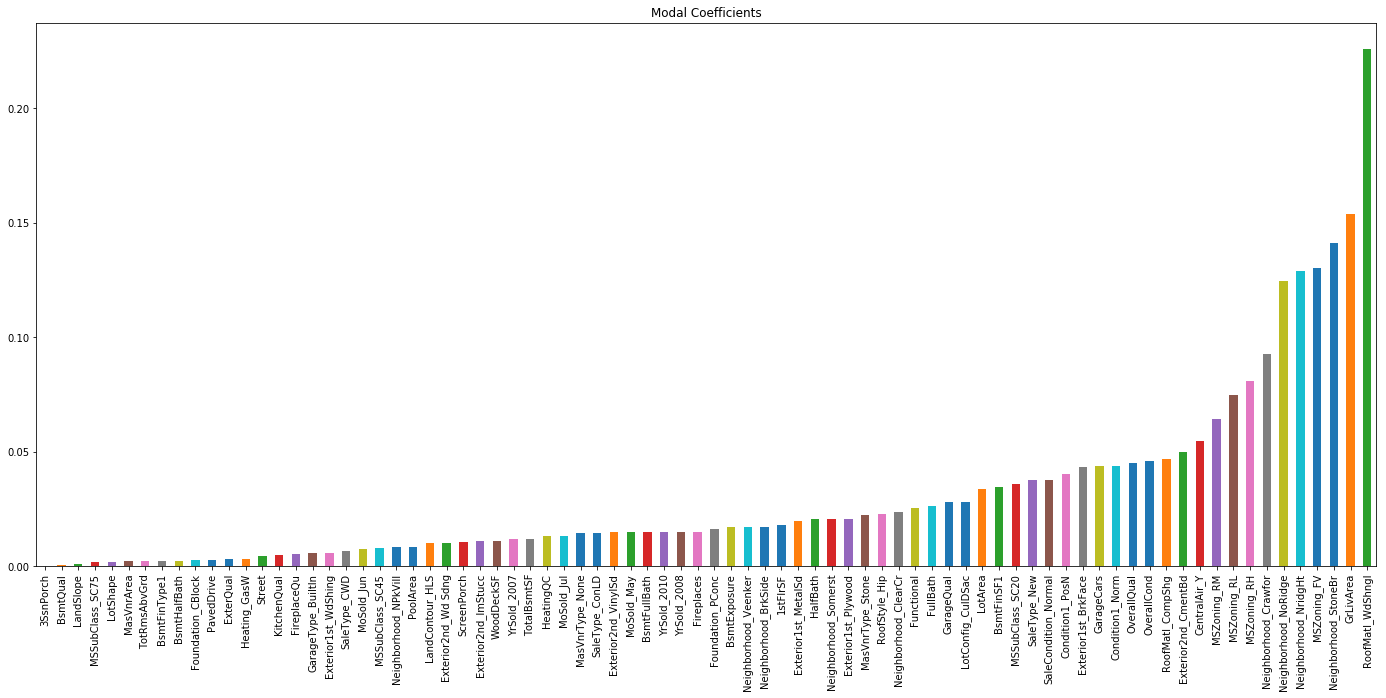

In [39]:
plt.figure(figsize=(24,10))
predictors = X_train.columns

coef = pd.Series(lasso_reg_best.coef_,predictors).sort_values()

coef = coef[coef>0]

coef.plot(kind='bar', title='Modal Coefficients')

In [40]:
len(coef)

80

### Lasso regression selected only 80 features out of the 235 total features

## 5.1. Lasso Regression using Selected features only

In [41]:
selected_features = list(coef.index.values)

In [42]:
lasso_reg_selected_best = Lasso(alpha = 0.0003, max_iter = 10000)
lasso_reg_selected_best.fit(X_train_scaled[selected_features], y_train)

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
y_train_pred_lasso = lasso_reg_selected_best.predict(X_train_scaled[selected_features])
R2_lasso = r2_score(y_train,y_train_pred_lasso)
print('Lasso R-Squared Score (train): {}'
     .format(R2_lasso))

rmse_train_lasso = sqrt(mean_squared_error(y_train,y_train_pred_lasso))
print('Lasso RMSE (train): {}'
     .format(rmse_train_lasso))


Lasso R-Squared Score (train): 0.913971991604054
Lasso RMSE (train): 0.11866577972288359


In [44]:
y_test_pred_lasso = lasso_reg_selected_best.predict(X_test_scaled[selected_features])
R2_test_lasso = r2_score(y_test,y_test_pred_lasso)
print('Lasso R-Squared Score (test): {}'
     .format(R2_test_lasso))

rmse_test_lasso = sqrt(mean_squared_error(y_test,y_test_pred_lasso))
print('Lasso RMSE(test): {}'
     .format(rmse_test_lasso))

list_model_rmse['Lasso Regression Selected'] = rmse_test_lasso
list_model_r2['Lasso Regression Selected'] = R2_test_lasso

Lasso R-Squared Score (test): 0.8910665162975772
Lasso RMSE(test): 0.12647760317908524


# 6. Decision Tree Regressor using GridSearch & Cross-Validation

In [45]:
dt_reg = DecisionTreeRegressor()
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gs_dt = GridSearchCV(dt_reg, param_grid, cv = 5, return_train_score=True)
gs_dt.fit(X_scaled, y)
gs_dt.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'max_depth': 10, 'min_samples_leaf': 10}

In [46]:
# Create decision tree model with best params
dt_reg_best = DecisionTreeRegressor(random_state=10, max_depth=10, min_samples_leaf=10)
# Fit the model
dt_reg_best.fit(X_train_scaled, y_train)
# Predict test data
y_pred1 = dt_reg_best.predict(X_test_scaled)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [47]:
R2_dt= r2_score(y_test, y_pred1)
print('DT R-Squared Score (test): {}'
     .format(R2_dt))

rmse_dt =  sqrt(mean_squared_error(y_test, y_pred1))
print('DT RMSE(test): {}'
     .format(rmse_dt))

list_model_rmse['Decision Tree Regression'] = rmse_dt
list_model_r2['Decision Tree Regression'] = R2_dt

DT R-Squared Score (test): 0.7384020697154929
DT RMSE(test): 0.19599729714821745


# 7. Random Forests using GridSearch & Cross-Validation

In [48]:
rf_reg = RandomForestRegressor(random_state=10)

param_grid = { 
    'n_estimators': [46,47,48,49,50,51,52],
    'min_samples_split': [11,12,13],
    'min_samples_leaf' : [4,5,6],
    'max_depth' : [5,6,7,8,9,10]
}

gs_rf = GridSearchCV(rf_reg, param_grid, cv= 5)
gs_rf.fit(X_scaled, y)

gs_rf.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [46, 47, 48, 49, 50, 51, 52], 'min_samples_split': [11, 12, 13], 'min_samples_leaf': [4, 5, 6], 'max_depth': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 11,
 'n_estimators': 51}

In [49]:
rf_reg_best = RandomForestRegressor(random_state=10, max_depth=10, min_samples_leaf=4, min_samples_split=11, n_estimators=51)
rf_reg_best.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [50]:
y_pred2 = rf_reg_best.predict(X_test_scaled)
R2_rf = r2_score(y_test,y_pred2)
print('Random Forests R-Squared Score (test): {}'
     .format(R2_rf))

rmse_rf = sqrt(mean_squared_error(y_test,y_pred2))
print('Random Forests RMSE (test): {}'
     .format(rmse_rf))

list_model_rmse['Random Forest Regression'] = rmse_rf
list_model_r2['Random Forest Regression'] = R2_rf

Random Forests R-Squared Score (test): 0.8449599968754361
Random Forests RMSE (test): 0.15088803916701082


# 8. XGBoost using GridSearch and Cross-Validation

In [51]:
from xgboost import XGBRegressor
XGboost = XGBRegressor()
param_grid = {'n_estimators':[100,500,1000],
             'learning_rate':[0.02, 0.05, 0.1]}

gs_xgboost = GridSearchCV(XGboost, param_grid, cv=5)
gs_xgboost.fit(X, y)
print('GridSearch Best Hyper-Params (XGBoost): {}'
     .format(gs_xgboost.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500, 1000], 'learning_rate': [0.02, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearch Best Hyper-Params (XGBoost): {'learning_rate': 0.02, 'n_estimators': 1000}


In [52]:
best_xgboost = XGBRegressor(learning_rate=0.02, n_estimators=1000)
best_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
# make predictions
predictions = best_xgboost.predict(X_test)

rmse_test_xgboost = sqrt(mean_squared_error(predictions, y_test))

print("XGBoost - Root Mean Squared Error (Test) : " + str(rmse_test_xgboost))

R2_xgboost = r2_score(y_test,predictions)

print("XGBoost - R-Squared Score (Test) : " + str(R2_xgboost))

XGBoost - Root Mean Squared Error (Test) : 0.12738911958488694
XGBoost - R-Squared Score (Test) : 0.8894907042911083


In [54]:
list_model_rmse['XGBoost'] = rmse_test_xgboost
list_model_r2['XGBoost'] = R2_xgboost

# Comparing Different Models

In [72]:
pd.DataFrame.from_dict(list_model_rmse, orient='index', columns=['RMSE']).sort_values(by='RMSE')

,RMSE
Lasso Regression,0.124055
Ridge Regression,0.124893
Lasso Regression Selected,0.126478
XGBoost,0.127389
Linear Regression,0.127791
Random Forest Regression,0.150888
KNN,0.166676
Decision Tree Regression,0.195997


In [73]:
pd.DataFrame.from_dict(list_model_r2, orient='index', columns=['R-Squared']).sort_values(by='R-Squared', ascending=False)

,R-Squared
Lasso Regression,0.895199
Ridge Regression,0.893779
Lasso Regression Selected,0.891067
XGBoost,0.889491
Linear Regression,0.888793
Random Forest Regression,0.844960
KNN,0.810818
Decision Tree Regression,0.738402


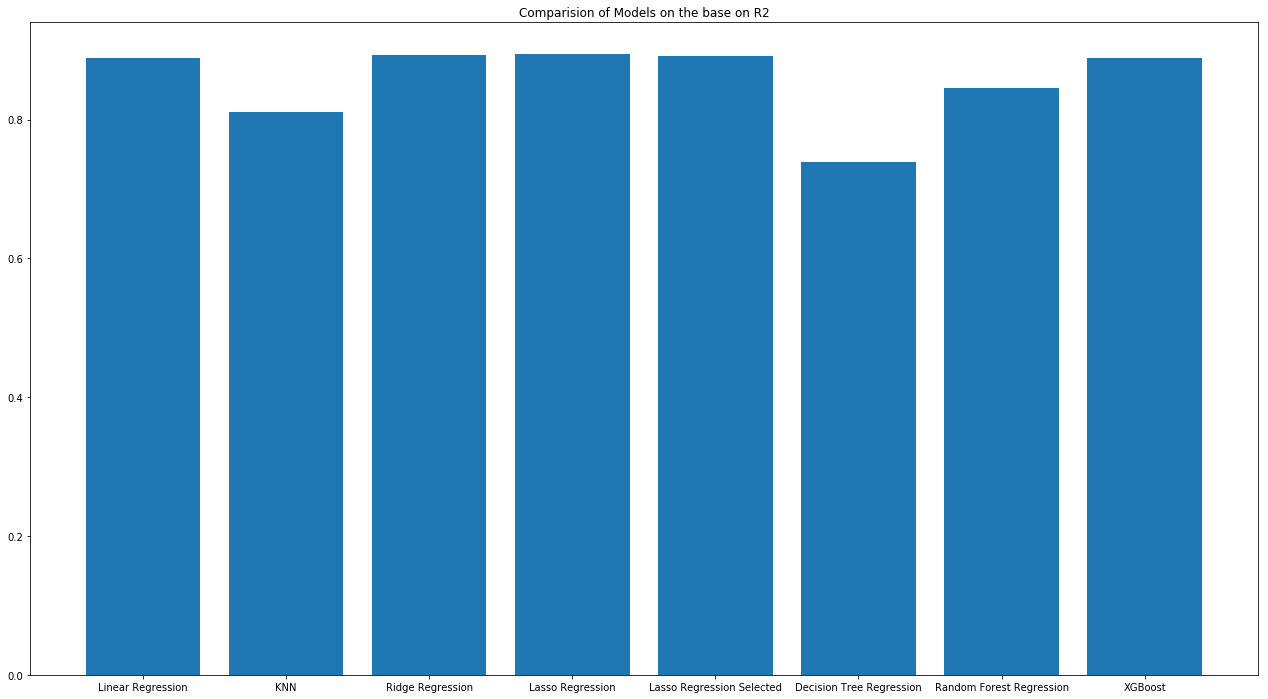

In [58]:
plt.figure(figsize=(22,12))
plt.bar(range(len(list_model_r2)), list(list_model_r2.values()), align='center')
plt.xticks(range(len(list_model_r2)), list(list_model_r2.keys()))
plt.title("Comparision of Models on the base on R2");

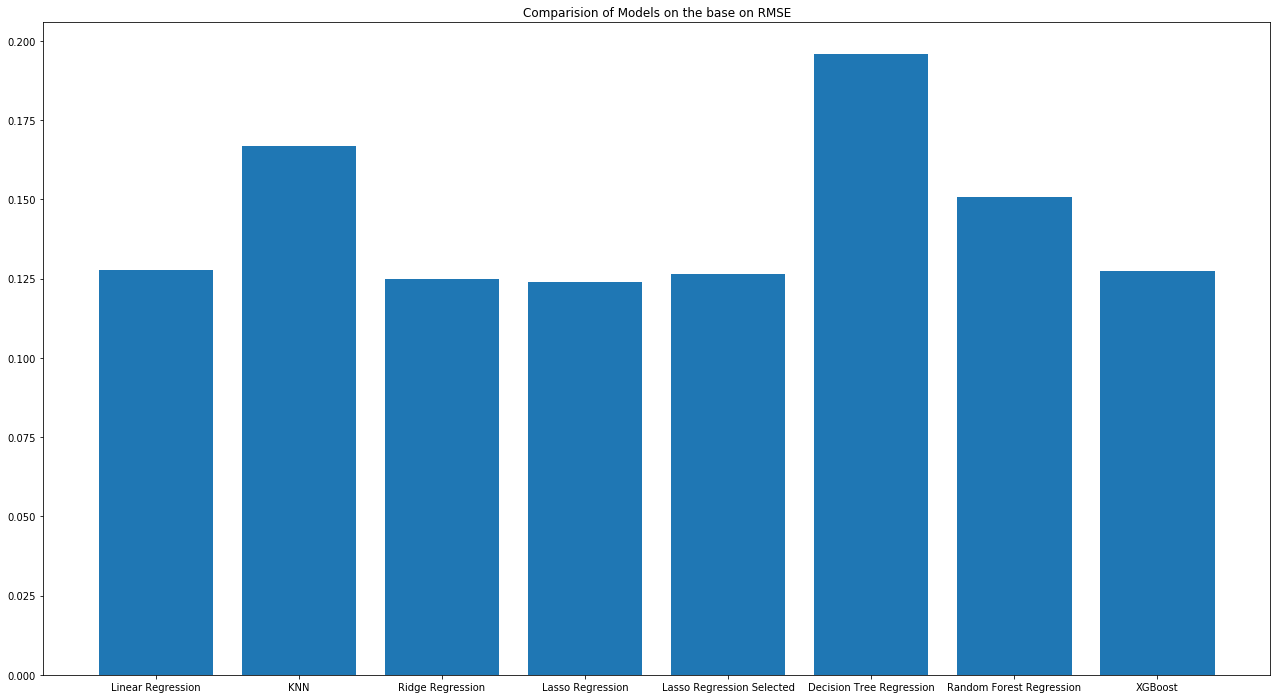

In [60]:
plt.figure(figsize=(22,12))
plt.bar(range(len(list_model_rmse)), list(list_model_rmse.values()), align='center')
plt.xticks(range(len(list_model_rmse)), list(list_model_rmse.keys()))
plt.title("Comparision of Models on the base on RMSE");

In [147]:
X_train_scaled.to_csv("X_train_scaled.csv")
X_test_scaled.to_csv("X_test_scaled.csv")

y_test.to_csv("y_test.csv")
y_train.to_csv("y_train.csv")

# Predicting on actual test data - Lasso Regression

In [160]:
predicted_prices = lasso_reg_best.predict(df3_test_scaled)

In [153]:
test_dataset = pd.read_csv('test.csv')

In [161]:
my_submission = pd.DataFrame({'Id': test_dataset.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission2.csv', index=False)

In [162]:
my_submission

,Id,SalePrice
0,1461,11.634162
1,1462,11.907683
2,1463,12.167930
3,1464,12.139704
4,1465,12.195274
5,1466,12.024829
6,1467,12.065018
7,1468,11.985659
8,1469,12.214044
9,1470,11.756206
